In [868]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

# Modélisation

In [869]:
df = pd.read_csv('dataset_clean.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [870]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [871]:
df.corrwith(df.charges)

/tmp/ipykernel_50265/2806792165.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df.charges)


age         0.298308
bmi         0.198401
children    0.067389
charges     1.000000
dtype: float64

In [872]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42, stratify=X['smoker'])
dummy = DummyRegressor()
X_train.head()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)



-0.0010185684988295307

In [873]:
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (1069, 6)
Test set: (268, 6)


In [874]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

### Pipeline

In [875]:
# Séparation des colonnes numériques et catégorielles
num_col = ["age", "bmi", "children"]
cat_col = ["sex", "smoker"]

In [876]:
# Création de pipelines
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())


In [877]:
# Création d'un Préprocessor pour appliquer les pipelines crées pour les transfomations sur les colonnes
preprocessing = make_column_transformer((num_pipeline, num_col),
                (cat_pipeline, cat_col))
preprocessing = make_pipeline(preprocessing, PolynomialFeatures())

### Regression Linéaire

In [878]:
# Modèle de Regression Linéaire


model_lr= make_pipeline(preprocessing, LinearRegression())

model_lr.fit(X_train,y_train)
cross_val_score(model_lr, X_train, y_train, cv=5).mean()

0.8212421692617333

### Elastic Net (Lasso/Ridge)

In [879]:
# Définir les hyperparamètres à tester avec le grid search
elastic_net = ElasticNet()
pipe_el = make_pipeline(preprocessing, elastic_net)

pipe_el.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('columntransformer',
                    ColumnTransformer(transformers=[('pipeline-1',
                                                     Pipeline(steps=[('standardscaler',
                                                                      StandardScaler())]),
                                                     ['age', 'bmi', 'children']),
                                                    ('pipeline-2',
                                                     Pipeline(steps=[('onehotencoder',
                                                                      OneHotEncoder())]),
                                                     ['sex', 'smoker'])])),
                   ('polynomialfeatures', PolynomialFeatures())])),
  ('elasticnet', ElasticNet())],
 'verbose': False,
 'pipeline': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('pipeline-1',
                                     

In [880]:
param_grid = {"elasticnet__alpha": np.linspace(0.001,1000, 1000),
              "elasticnet__l1_ratio": [1]}
clf = RandomizedSearchCV(pipe_el, param_grid, random_state=42 , n_iter=500, cv=5)

clf.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/data_anayse_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.258e+08, tolerance: 1.289e+07
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_anayse_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.264e+08, tolerance: 1.283e+07
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_anayse_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('columntransformer',
                                                               ColumnTransformer(transformers=[('pipeline-1',
                                                                                                Pipeline(steps=[('standardscaler',
                                                                                                                 StandardScaler())]),
                                                                                                ['age',
                                                                                                 'bmi',
                                                                                                 'children']),
                                                                                               ('pipeline-2',
                                                                                                Pipeline(steps=[('onehotencoder',
                                                                                                                 OneHotEncoder())]),
                                                                                                ['sex',
                                                                                                 'smoker'])])),
                                                              ('polynomialfeatures',
                                                               PolynomialFeatur...
       9.70971e+02, 9.71972e+02, 9.72973e+02, 9.73974e+02, 9.74975e+02,
       9.75976e+02, 9.76977e+02, 9.77978e+02, 9.78979e+02, 9.79980e+02,
       9.80981e+02, 9.81982e+02, 9.82983e+02, 9.83984e+02, 9.84985e+02,
       9.85986e+02, 9.86987e+02, 9.87988e+02, 9.88989e+02, 9.89990e+02,
       9.90991e+02, 9.91992e+02, 9.92993e+02, 9.93994e+02, 9.94995e+02,
       9.95996e+02, 9.96997e+02, 9.97998e+02, 9.98999e+02, 1.00000e+03]),
                                        'elasticnet__l1_ratio': [1]},
                   random_state=42)

In [881]:
clf.best_score_

0.8220888241711692

In [882]:
clf.best_params_

{'elasticnet__l1_ratio': 1, 'elasticnet__alpha': 70.07100000000001}

In [883]:
# # Créer un objet GridSearchCV pour effectuer la recherche de hyperparamètres
param_grid = {"elasticnet__alpha": np.linspace(5,9, 100),
              "elasticnet__l1_ratio": [1]}
grid_search = GridSearchCV(pipe_el, param_grid, cv=5, scoring="r2", return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('columntransformer',
                                                         ColumnTransformer(transformers=[('pipeline-1',
                                                                                          Pipeline(steps=[('standardscaler',
                                                                                                           StandardScaler())]),
                                                                                          ['age',
                                                                                           'bmi',
                                                                                           'children']),
                                                                                         ('pipeline-2',
                                                                                          Pipeline(steps=[('onehotencoder',
                                                                                                           OneHotEncoder())]),
                                                                                          ['sex',
                                                                                           'smoker'])])),
                                                        ('polynomialfeatures',
                                                         PolynomialFeatures())]...
       7.82828283, 7.86868687, 7.90909091, 7.94949495, 7.98989899,
       8.03030303, 8.07070707, 8.11111111, 8.15151515, 8.19191919,
       8.23232323, 8.27272727, 8.31313131, 8.35353535, 8.39393939,
       8.43434343, 8.47474747, 8.51515152, 8.55555556, 8.5959596 ,
       8.63636364, 8.67676768, 8.71717172, 8.75757576, 8.7979798 ,
       8.83838384, 8.87878788, 8.91919192, 8.95959596, 9.        ]),
                         'elasticnet__l1_ratio': [1]},
             return_train_score=True, scoring='r2')

In [884]:
grid_search.best_params_

{'elasticnet__alpha': 9.0, 'elasticnet__l1_ratio': 1}

In [885]:
grid_search.best_estimator_

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'bmi',
                                                                    'children']),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder())]),
                                                                   ['sex',
                                                                    'smoker'])])),
                                 ('polynomialfeatures',
                                  PolynomialFeatures())])),
                ('elasticnet', ElasticNet(alpha=9.0, l1_ratio=1))])

In [886]:
best_pipe_el = grid_search.best_estimator_

In [887]:
grid_search.best_score_

0.821134361563951

In [888]:
# Modèle Elastic Net

model_elastic = make_pipeline(preprocessing, ElasticNet())


model_elastic.fit(X_train, y_train)


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'bmi',
                                                                    'children']),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder())]),
                                                                   ['sex',
                                                                    'smoker'])])),
                                 ('polynomialfeatures',
                                  PolynomialFeatures())])),
                ('elasticnet', ElasticNet())])

### Résidus

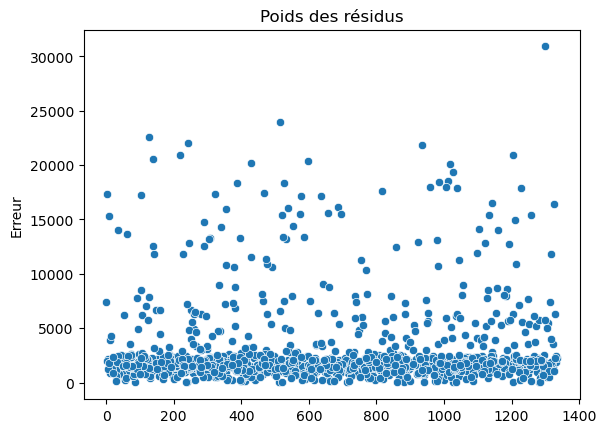

In [889]:
y_pred = model_lr.predict(X_train)

residual = (y_train - y_pred).abs()

sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('Erreur')
plt.show()

In [890]:
to_drop = residual[residual > 14500].index

In [891]:
X_train_new = X_train.drop(to_drop)
y_train_new = y_train.drop(to_drop)

In [892]:


model_lr.fit(X_train_new,y_train_new)
cross_val_score(model_lr, X_train_new, y_train_new, cv=5).mean()

0.9078554432187204

In [893]:
model_lr.score(X_test, y_test)

0.8977943936220055

In [894]:
print(len(model_lr[-1].coef_))

36


In [895]:
model_lr[:-1].get_feature_names_out()

array(['1', 'pipeline-1__age', 'pipeline-1__bmi', 'pipeline-1__children',
       'pipeline-2__sex_female', 'pipeline-2__sex_male',
       'pipeline-2__smoker_no', 'pipeline-2__smoker_yes',
       'pipeline-1__age^2', 'pipeline-1__age pipeline-1__bmi',
       'pipeline-1__age pipeline-1__children',
       'pipeline-1__age pipeline-2__sex_female',
       'pipeline-1__age pipeline-2__sex_male',
       'pipeline-1__age pipeline-2__smoker_no',
       'pipeline-1__age pipeline-2__smoker_yes', 'pipeline-1__bmi^2',
       'pipeline-1__bmi pipeline-1__children',
       'pipeline-1__bmi pipeline-2__sex_female',
       'pipeline-1__bmi pipeline-2__sex_male',
       'pipeline-1__bmi pipeline-2__smoker_no',
       'pipeline-1__bmi pipeline-2__smoker_yes', 'pipeline-1__children^2',
       'pipeline-1__children pipeline-2__sex_female',
       'pipeline-1__children pipeline-2__sex_male',
       'pipeline-1__children pipeline-2__smoker_no',
       'pipeline-1__children pipeline-2__smoker_yes',
       '

In [896]:
model_lr[-1].intercept_

-655259244838478.2

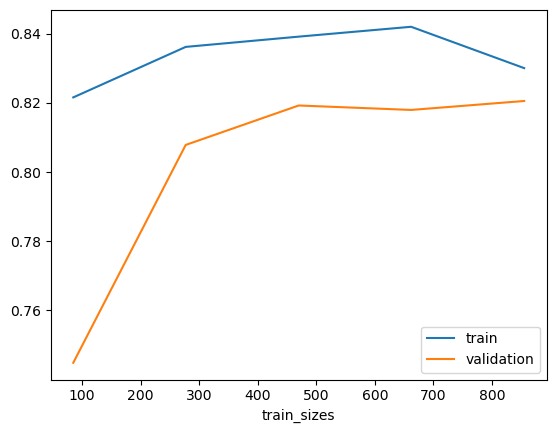

In [897]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model_lr,X_train,y_train,return_times=True)
                                           
                                           
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

In [898]:
import pickle

# Enregistrez le modèle dans un fichier pickle
with open('model.pkl', 'wb') as file:
  pickle.dump(model_lr, file)

In [899]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from statsmodels.formula.api import ols


# # Chargez votre modèle et faites des prédictions sur vos données
# model = sm.OLS(y_train, X_train)
# results = model.fit()

# # Calculez la distance de Cook pour chaque observation
# influence = results.get_influence()
# cooks_distance = influence.cooks_distance[0]

# # Affichez les distances de Cook
# print(cooks_distance)